In [1]:
data = catalog.load("ena-diario-parana")
data.head()

2021-12-09 10:52:57,867 - kedro.io.data_catalog - INFO - Loading data from `ena-diario-parana` (CSVDataSet)...


,nom_bacia,ena_bruta_bacia_mwmed,ena_bruta_bacia_percentualmlt,ena_armazenavel_bacia_mwmed,ena_armazenavel_bacia_percentualmlt
ena_data,,,,,
2000-01-01,PARANA,12073.358398,58.836899,12073.358398,58.836899
2000-01-02,PARANA,12579.799805,61.305000,12579.799805,61.305000
2000-01-03,PARANA,13393.181641,65.268799,13393.181641,65.268799
2000-01-04,PARANA,14473.228516,70.532204,14473.228516,70.532204
2000-01-05,PARANA,15750.317383,76.755798,15750.317383,76.755798


In [4]:
import pandas as pd

def generate_windows(df, window_size, shift):
    N = len(data)
    n = N//window_size
    
    df = df.reset_index()
    
    windows = []

    k = 0
    window_id = 1
    while (N-k-window_size) >= 0:
        window = df[['ena_data','ena_bruta_bacia_mwmed']].iloc[(N-k-window_size):(N-k)].reset_index()
        window['window_id'] = window_id
        window['window_index'] = range(0,window_size)
        window.set_index('ena_data',inplace=True)
        
        piv = window.pivot(index='window_id', columns='window_index', values="ena_bruta_bacia_mwmed")
        piv['from_date'] = min(window.index.date)
        piv['to_date'] = max(window.index.date)
        
        windows.append(piv)
        
        k = k + shift
        window_id += 1
        
    return pd.concat(windows)
    

In [5]:
%%time

windows = generate_windows(data, (128+15), 1)

CPU times: user 52.5 s, sys: 256 ms, total: 52.8 s
Wall time: 52.9 s


In [6]:
windows

window_index,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,from_date,to_date
window_id,,,,,,,,,,,,,,,,,,,,,
1,6009.165039,6026.303223,6012.338867,5926.975098,5902.299805,5894.518066,5863.095215,5854.470215,5832.810059,5747.207031,...,11954.939453,11944.419922,11994.762695,11912.621094,11690.402344,11435.442383,11159.250000,10951.396484,2021-07-17,2021-12-06
2,5876.721191,6009.165039,6026.303223,6012.338867,5926.975098,5902.299805,5894.518066,5863.095215,5854.470215,5832.810059,...,11982.297852,11954.939453,11944.419922,11994.762695,11912.621094,11690.402344,11435.442383,11159.250000,2021-07-16,2021-12-05
3,5897.960938,5876.721191,6009.165039,6026.303223,6012.338867,5926.975098,5902.299805,5894.518066,5863.095215,5854.470215,...,12058.655273,11982.297852,11954.939453,11944.419922,11994.762695,11912.621094,11690.402344,11435.442383,2021-07-15,2021-12-04
4,5925.634766,5897.960938,5876.721191,6009.165039,6026.303223,6012.338867,5926.975098,5902.299805,5894.518066,5863.095215,...,11989.577148,12058.655273,11982.297852,11954.939453,11944.419922,11994.762695,11912.621094,11690.402344,2021-07-14,2021-12-03
5,5975.032227,5925.634766,5897.960938,5876.721191,6009.165039,6026.303223,6012.338867,5926.975098,5902.299805,5894.518066,...,11790.146484,11989.577148,12058.655273,11982.297852,11954.939453,11944.419922,11994.762695,11912.621094,2021-07-13,2021-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865,15750.317383,17224.037109,18835.708984,20634.363281,22455.384766,24218.123047,25431.027344,26002.503906,26040.896484,25701.451172,...,10213.267578,10200.324219,10166.172852,10153.076172,10102.723633,10056.246094,9963.262695,9922.350586,2000-01-05,2000-05-26
7866,14473.228516,15750.317383,17224.037109,18835.708984,20634.363281,22455.384766,24218.123047,25431.027344,26002.503906,26040.896484,...,10247.427734,10213.267578,10200.324219,10166.172852,10153.076172,10102.723633,10056.246094,9963.262695,2000-01-04,2000-05-25
7867,13393.181641,14473.228516,15750.317383,17224.037109,18835.708984,20634.363281,22455.384766,24218.123047,25431.027344,26002.503906,...,10333.887695,10247.427734,10213.267578,10200.324219,10166.172852,10153.076172,10102.723633,10056.246094,2000-01-03,2000-05-24


In [2]:
!pip install pywavelets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.3 MB 2.3 MB/s            


In [22]:
ts = windows.iloc[0][:len(ts)-2]

In [25]:
import matplotlib.pyplot as plt

2021-12-09 11:50:54,882 - matplotlib.font_manager - INFO - generated new fontManager


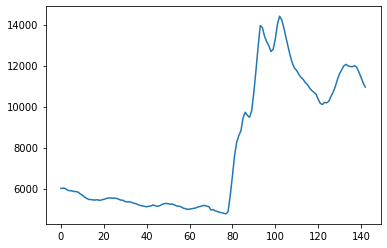

In [26]:
plt.plot(ts)

In [27]:
import pywt

In [52]:
for i in range(10,0,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1


In [86]:
import pywt
import numpy as np

def mydwt(ts, wavelet):
    
    coef = {}
    coef['ts'] = ts
    level = int(np.log(len(ts)))
    
    cA = ts
    for l in range(1,level+1):
        cA, cD = pywt.dwt(cA, wavelet)
        key = 'd{}'.format(l)
        coef[key] = cD
        
    key = 'c{}'.format(level)
    coef[key] = cA
    
    return coef

def plot_dwt(dwt):
    fig, axs = plt.subplots(len(dwt))
    fig.suptitle('DWT')
    
    keys = list(dwt.keys())
    for i in range(len(dwt)):
        coef = dwt[keys[i]]
        axs[i].plot(coef)
        axs[i].set_title(keys[i])
    
    plt.tight_layout()
    plt.show()

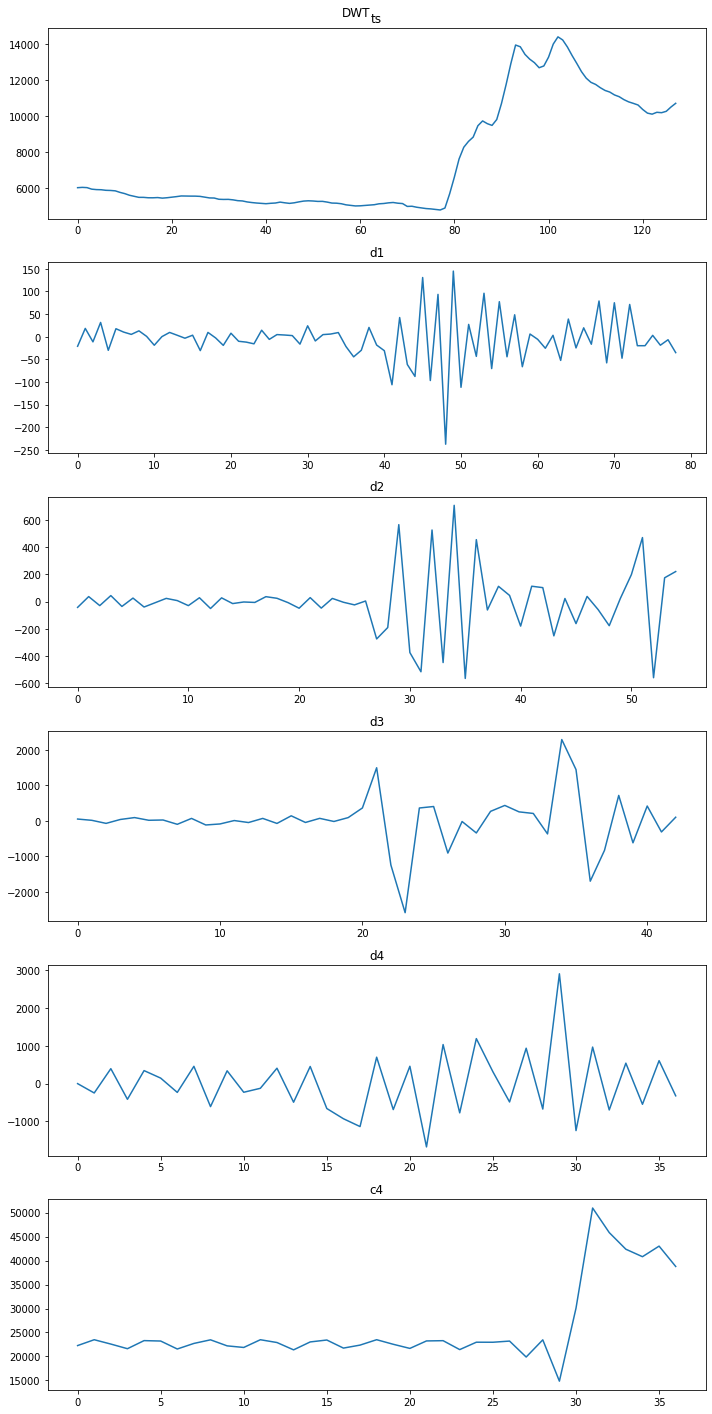

In [118]:
plt.rcParams["figure.figsize"] = (10, 20)

dwt = mydwt(ts[:-15], 'db16')
plot_dwt(dwt)

# Generate Training Dataset

In [109]:
def extract_features(ts, wavelet, include_ts = True):
    
    level = int(np.log(len(ts)))
    if include_ts is True:
        features = ts
    else:
        features = np.array([])
        
    cA = ts
    for l in range(1,level+1):
        cA, cD = pywt.dwt(cA, wavelet)
        
        features = np.concatenate([features,cD])
        
    features = np.concatenate([features,cA])
    
    return features

In [106]:
ts.shape

(143,)

In [110]:
features = extract_features(ts[:-15], 'db1')

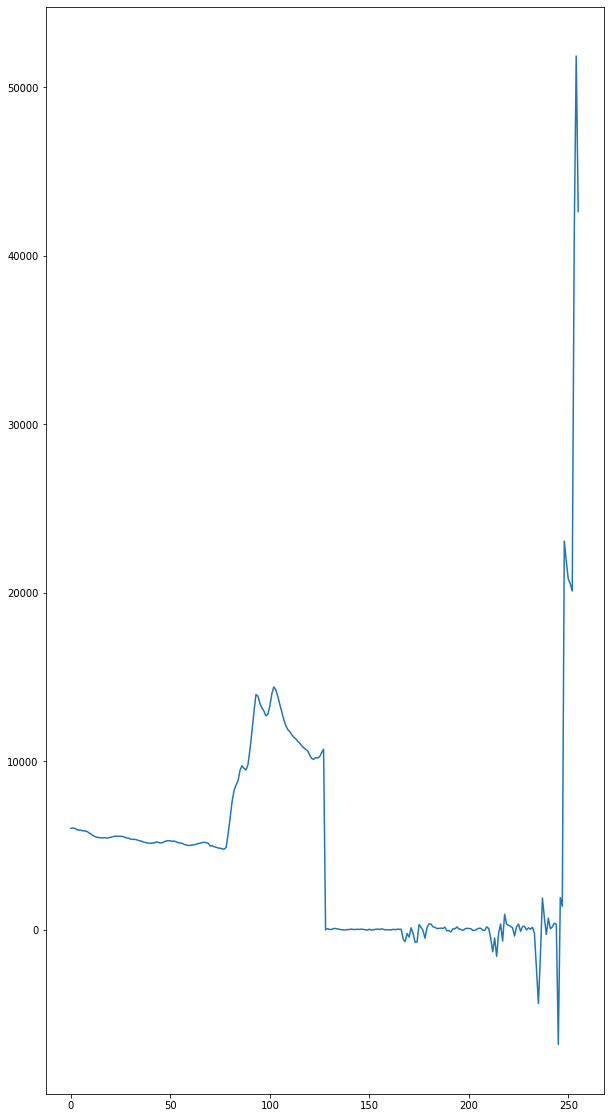

In [114]:
plt.plot(features)